# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.33065549 2.88152374 2.80831379 2.93729873 2.75915981 2.26231032
 2.07425564 2.91291479 2.44195875 2.2846748 ]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

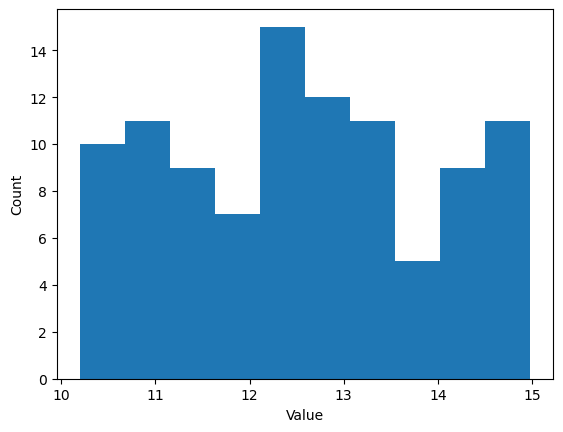

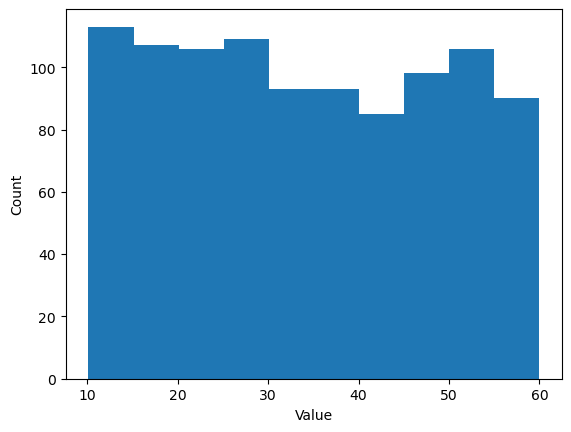

In [2]:
# your code here
import matplotlib.pyplot as plt
import numpy as np

def generate_uniform_random(bottom, ceiling, count):
    x = np.random.uniform(size=count)
    randoms = bottom + (ceiling - bottom) * x
    return randoms

bottom1 = 10
ceiling1 = 15
count1 = 100


randoms1 = generate_uniform_random(bottom1, ceiling1, count1)

plt.hist(randoms1, bins=10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

bottom2 = 10
ceiling2 = 60
count2 = 1000

randoms2 = generate_uniform_random(bottom2, ceiling2, count2)

plt.hist(randoms2, bins=10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()


How are the two distributions different?

In [3]:
#the differences between the two distributions are the range of values 
# (10 to 15 in the first, and 10 to 60 in the second)
# and the count of numbers generated ( 100 in the first and 1000 in the second)

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

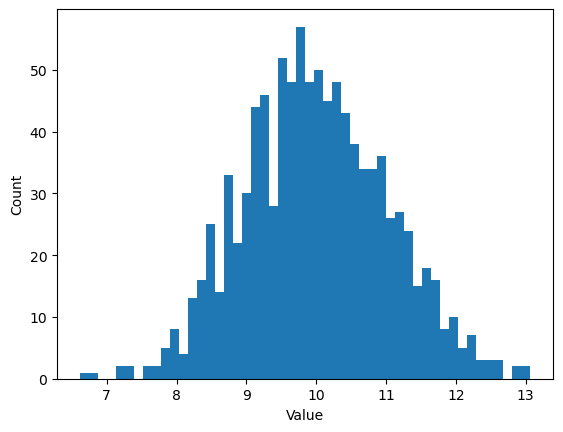

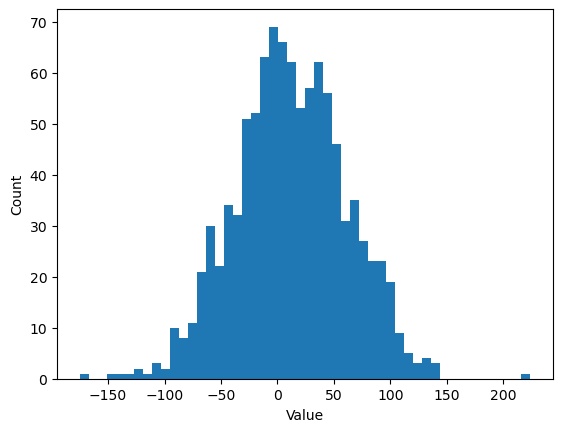

In [4]:
def gen_random(mean, std_dev, count):
    randoms = np.random.normal(mean, std_dev, count)
    return randoms

mean1 = 10
std_dev1 = 1
count1 = 1000

randoms1 = gen_random(mean1, std_dev1, count1)

plt.hist(randoms1, bins=50)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

mean2 = 10
std_dev2 = 50
count2 = 1000

randoms2 = gen_random(mean2, std_dev2, count2)

plt.hist(randoms2, bins=50)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()


How are the two distributions different?

In [ ]:
"""
The differences between the two distributions are the spread of values around the mean. 
The first case has a smaller spread (standard deviation of 1), resulting in a narrower distribution,
while the second case has a larger spread (standard deviation of 50), resulting in a broader distribution.
"""""

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

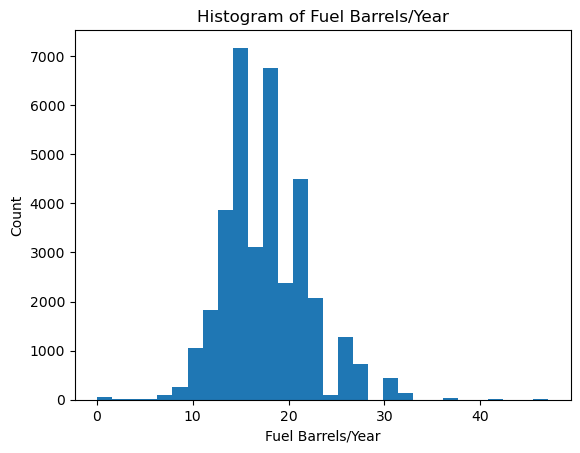

In [7]:
# your code here
import pandas as pd
import numpy as np

data = pd.read_csv("vehicles.csv")
plt.hist(data['Fuel Barrels/Year'], bins=30)
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('Count')
plt.title('Histogram of Fuel Barrels/Year')
plt.show()



2. CO2 Emission Grams/Mile 

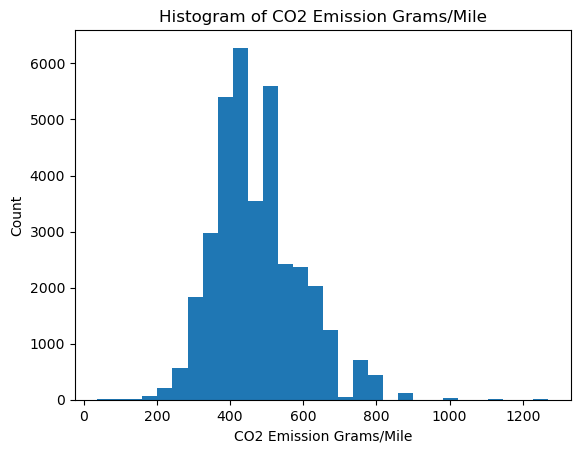

In [8]:
# your code here
plt.hist(data['CO2 Emission Grams/Mile'], bins=30)
plt.xlabel('CO2 Emission Grams/Mile')
plt.ylabel('Count')
plt.title('Histogram of CO2 Emission Grams/Mile')
plt.show()

3. Combined MPG

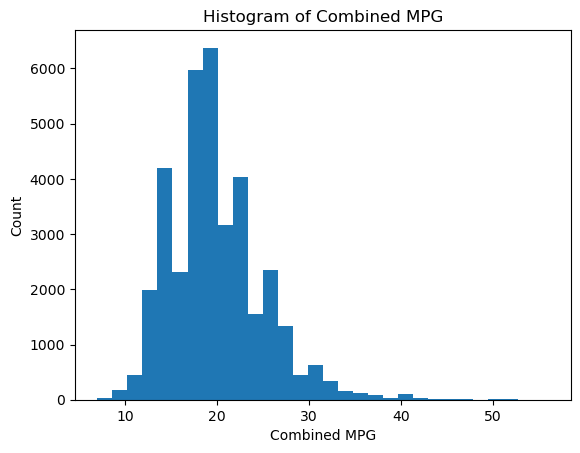

In [10]:
# your code here
plt.hist(data['Combined MPG'], bins=30)
plt.xlabel('Combined MPG')
plt.ylabel('Count')
plt.title('Histogram of Combined MPG')
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:


## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

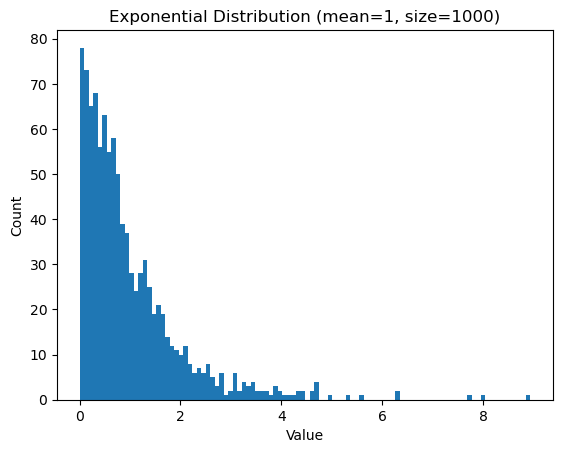

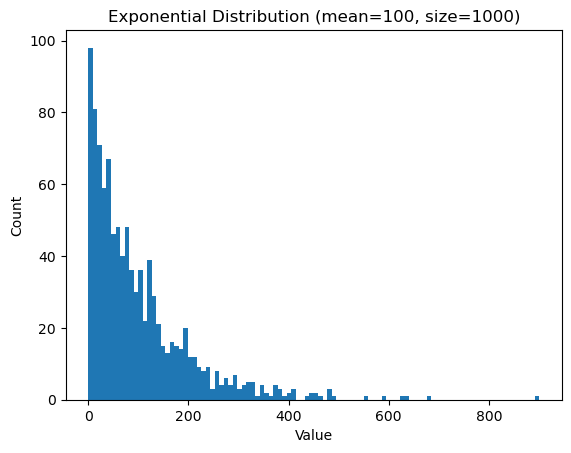

In [11]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def generate_exponential_random(mean, size):
    randoms = np.random.exponential(scale=mean, size=size)
    return randoms


mean1 = 1
size1 = 1000

randoms1 = generate_exponential_random(mean1, size1)

plt.hist(randoms1, bins=100)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Exponential Distribution (mean=1, size=1000)')
plt.show()

mean2 = 100
size2 = 1000

randoms2 = generate_exponential_random(mean2, size2)

plt.hist(randoms2, bins=100)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Exponential Distribution (mean=100, size=1000)')
plt.show()


How are the two distributions different?

In [ ]:
# your answer here:
# The difference between the two distributions is the change in their central tendency.
# The first sequence has a lower mean of 1, resulting in a concentration of values closer to zero,
# while the second sequence has a higher mean of 100, resulting in a broader distribution of values.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [12]:
# your answer here
# Hint: This is same as saying P(x<15)
mean = 10
rate = 1 / mean

time_threshold = 15

probability = 1 - np.exp(-rate * time_threshold)

print(probability)


0.7768698398515702


What is the probability that the customer will spend more than 15 minutes

In [14]:
# your answer here
probability = 1 - (1 - np.exp(-rate * time_threshold))
print(probability)

0.2231301601484298
